# Homework 2.1 | Data Cleaning

*Homework is designed to both test your knowlege and challenge you to apply familiar concepts to new applications. Answer clearly and completely. You are welcomed and encouraged to work in groups so long as your work is your own. Submit your figures and answers to [Gradescope](https://www.gradescope.com).*

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-2-1/data/'

## Q1. Handling Missing Values

In the dataset 'world_in_data.csv' the `Employment in agriculture (% of total employment)` variable has many missing values. We want a dataset with these missing values removed. After removing the countries with no records in the `Employment in agriculture (% of total employment)` column, how many countries remain in your dataset? *(Hint: Use the `.dropna()` function on the dataset to remove `Nan` values.)*

In [ ]:
ag = pd.read_csv(file_path + 'world_in_data.csv')

In [ ]:
ag.head()

,Country Name,Country Code,Employment in agriculture (% of total employment)
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,55.942418
2,Afghanistan,AFG,45.463952
3,Africa Western and Central,AFW,40.030929
4,Angola,AGO,56.224021


In [ ]:
ag.dropna()

,Country Name,Country Code,Employment in agriculture (% of total employment)
1,Africa Eastern and Southern,AFE,55.942418
2,Afghanistan,AFG,45.463952
3,Africa Western and Central,AFW,40.030929
4,Angola,AGO,56.224021
5,Albania,ALB,34.893423
...,...,...,...
260,Samoa,WSM,30.213101
262,"Yemen, Rep.",YEM,28.557880
263,South Africa,ZAF,18.793083
264,Zambia,ZMB,55.445262


## Q2. Handling Dates and Times

In the dataset `Monthly_Coffee_Prices.csv` the `date` variable isn't in the right format for our purposes. Construct a `year` variable to create a boxplot (code below). *(Hint: Use `pd.to_datetime()` to convert to a date and `.dt.year` to extract the year.)*

In [ ]:
prices = pd.read_csv(file_path + 'Monthly_Coffee_Prices.csv', index_col=0)

In [ ]:
prices.head()

,date,price
0,1973-08,0.654840
1,1973-09,0.652700
2,1973-10,0.659552
3,1973-11,0.646810
4,1973-12,0.670937


In [ ]:
prices['year'] = pd.to_datetime(prices['date']).dt.year
prices.head()

,date,price,year
389,2006-01,1.193275,2006
390,2006-02,1.121068,2006
391,2006-03,1.076543,2006
392,2006-04,1.084316,2006
393,2006-05,1.040318,2006


Text(0.5, 1.0, 'Boxplot of Coffee Prices')

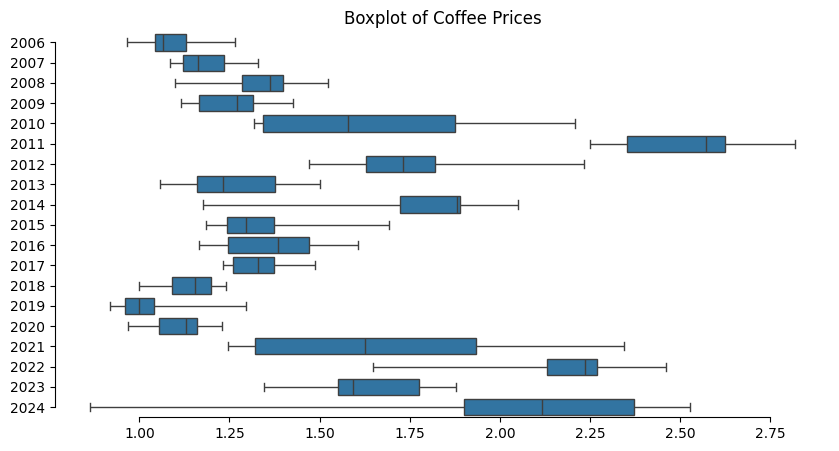

In [ ]:
# Create a Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(prices, x='price', y='year', whis=(0,100), orient='h')
sns.despine(trim=True)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot of Coffee Prices')

## Q3. Handling Strings and Numerical Values

In the dataset `Starbucks_Location_Hours_raw.csv`, use the `olsonTimeZoneId` variable to construct a new variable `GMT`, which contains the GMT time (time of day when it is midnight in Greenwich). Plot this new variable `GMT` as a histogram (code below). *(Hint: Use `.str.replace('GMT','')` to remove text from the start of the strings and `.to_numeric()` to turn the text into numbers.)*

In [ ]:
gmt = pd.read_csv(file_path + 'Starbucks_Location_Hours_GMT.csv', index_col=0)
gmt.head()

,storeNumber,countryCode,latitude,longitude,city,olsonTimeZoneId
0,34638-85784,HK,22.340700,114.201690,Hong Kong,GMT+08:00 Asia/Hong_Kong
1,32141-267986,HK,22.341694,114.194208,Hong Kong,GMT+08:00 Asia/Hong_Kong
2,15035-155445,HK,22.333520,114.196780,Kowloon,GMT+08:00 Asia/Hong_Kong
3,49646-268445,HK,22.331223,114.188143,香港,GMT+08:00 Asia/Hong_Kong
4,31944-224544,HK,22.323871,114.203796,Hong Kong,GMT+08:00 Asia/Hong_Kong


In [ ]:
# take (for example GMT+08:00 Asia/Hong_Kong) and strip out the number in column olsonTimeZoneId
gmt['GMT'] = gmt['olsonTimeZoneId'].str.replace('GMT','').str.split(':').str[0]
gmt['GMT'] = pd.to_numeric(gmt['GMT'])
gmt.head()

,storeNumber,countryCode,latitude,longitude,city,olsonTimeZoneId,GMT
0,34638-85784,HK,22.340700,114.201690,Hong Kong,GMT+08:00 Asia/Hong_Kong,8
1,32141-267986,HK,22.341694,114.194208,Hong Kong,GMT+08:00 Asia/Hong_Kong,8
2,15035-155445,HK,22.333520,114.196780,Kowloon,GMT+08:00 Asia/Hong_Kong,8
3,49646-268445,HK,22.331223,114.188143,香港,GMT+08:00 Asia/Hong_Kong,8
4,31944-224544,HK,22.323871,114.203796,Hong Kong,GMT+08:00 Asia/Hong_Kong,8


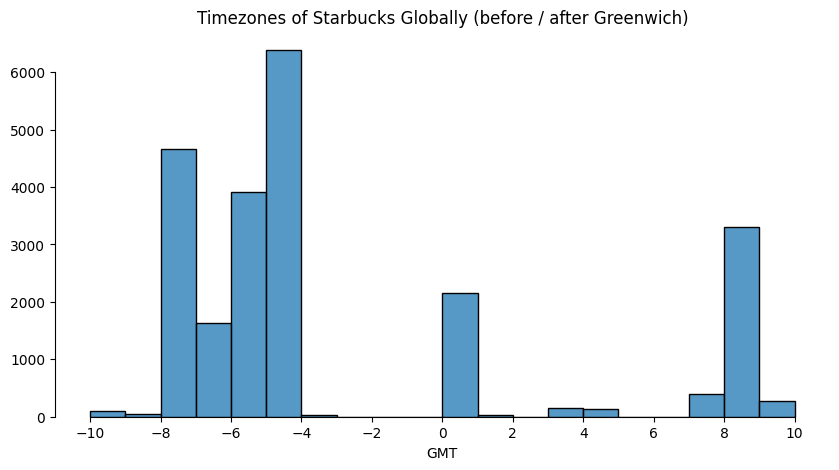

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(gmt, x='GMT', bins=range(-10,11,1))
plt.xticks(range(-10,11,2))
plt.xlabel('GMT')
plt.ylabel('')
plt.title('Timezones of Starbucks Globally (before / after Greenwich)')
sns.despine(trim=True)